#### Регрессионная модель с байесовской точки зрения

При вероятностном подходе модель линейной регрессии можно выразить
следующей формулой:

$$y \sim N(\mu=\alpha+x\beta, \epsilon)$$

Поскольку значения $\alpha, \beta, \epsilon$ неизвестны, формируем для них априорные распределения, самый классический и разумный вариант:

$$\alpha \sim N(\mu_\alpha, \sigma_\alpha)$$
$$\beta \sim N(\mu_\beta, \sigma_\beta)$$
$$\epsilon \sim |N(0, \sigma_\epsilon)|$$

Точечная оценка, получаемая с использованием метода наименьших квадратов (OLS), согласовывается с оценкой апостериорного максимума (maximum a posteriori – MAP) (модой апостериорного распределения), полученной из байесовской простой линейной регрессии с плоскими априорными распределениями.

Альтернативами HalfNormal-распределению для $\epsilon$ является равномерное распределение $Uniform(a, b)$ и полураспределение Коши $HalfCauchy(x_0, \gamma)$. В общем случае полураспределение Коши успешно работает как эффективное априорное распределение регуляризации. 

Однако равномерные распределения не всегда являются удачным выбором, за исключением тех случаев, когда известно, что параметр действительно строго ограничен.

Воспользуемся сгенерированным набором данных для примера:

In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
%load_ext watermark
%watermark --iversions

matplotlib: 3.3.3
numpy     : 1.19.2
seaborn   : 0.10.0
pymc3     : 3.10.0
scipy     : 1.5.2
arviz     : 0.11.1
pandas    : 1.1.4



In [3]:
np.random.seed(1)
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real*x
y = y_real + eps_real

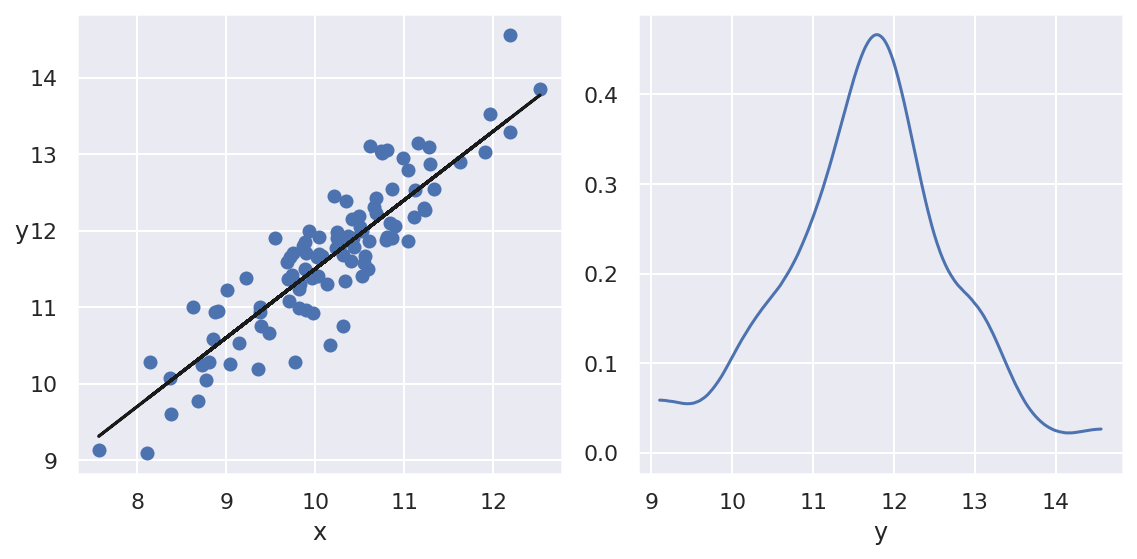

In [4]:
_, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(x, y)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].plot(x, y_real, 'k')
az.plot_kde(y, ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()

In [5]:
with pm.Model() as model_g:
    
    # Priors
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    eps = pm.HalfCauchy('eps', 5)
    
    # Likelihood
    mu = pm.Deterministic('mu', alpha + beta*x)
    y_var = pm.Normal('y', mu=mu, sd=eps, observed=y)
    # Аналог без pm.Deterministic: 
    # y = pm.Normal('y', mu=alpha + beta*x, sd=eps, observed=y)
    
    trace_g = pm.sample(2000, tune=1000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 9 seconds.


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'eps'}>,
        <AxesSubplot:title={'center':'eps'}>]], dtype=object)

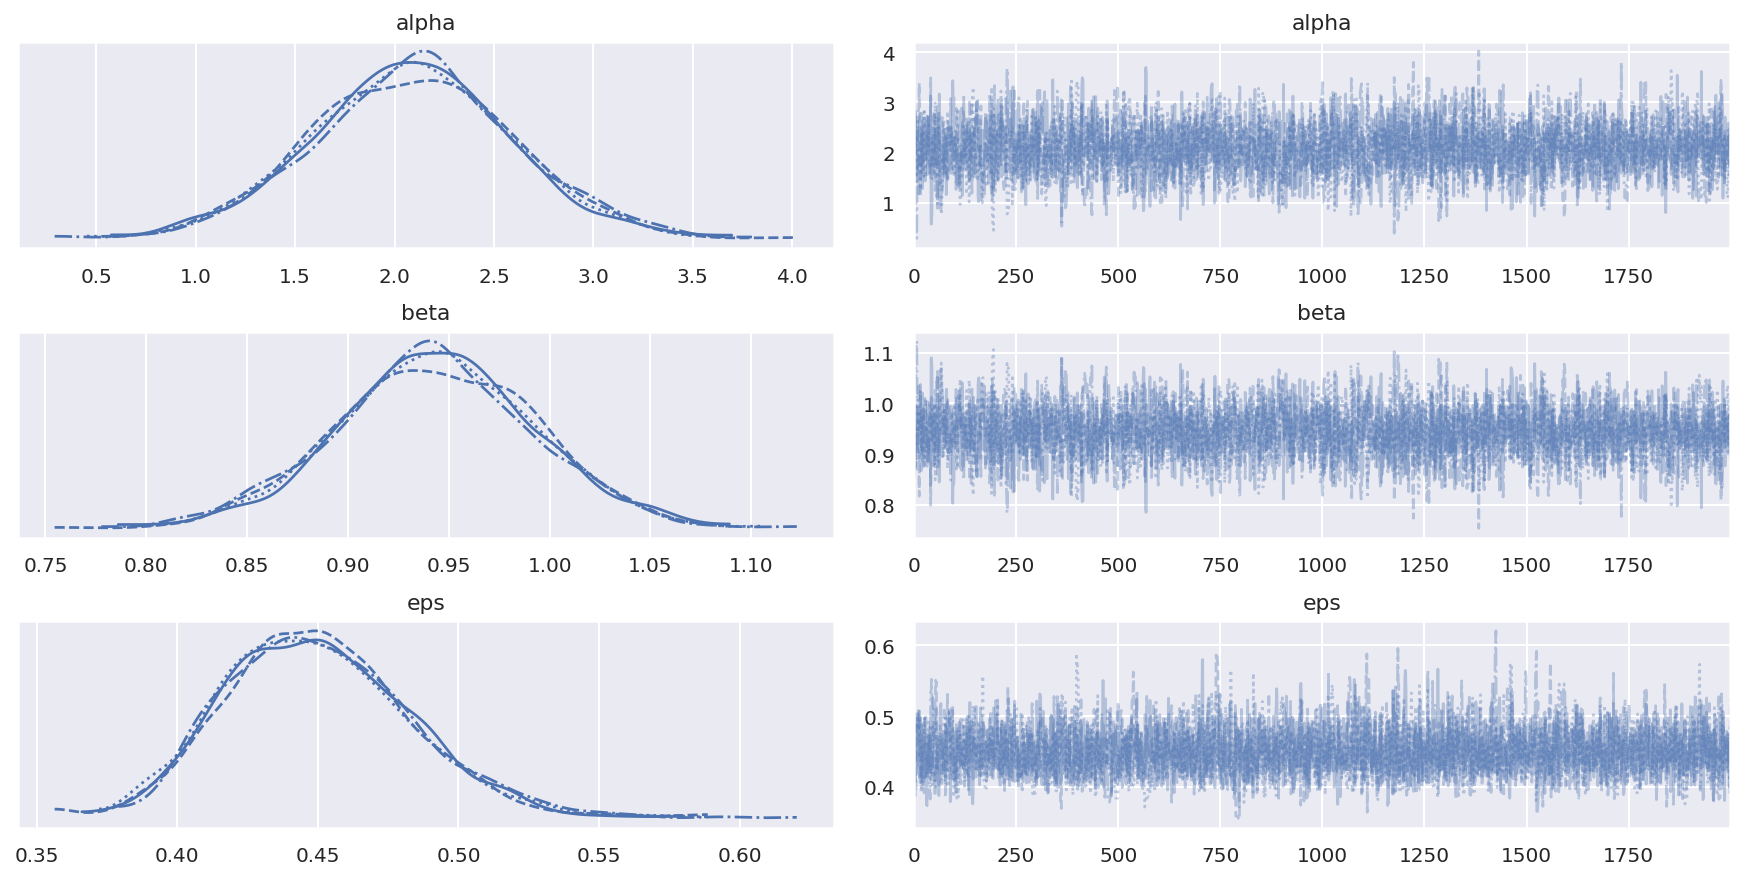

In [6]:
az.plot_trace(trace_g, var_names=['alpha', 'beta', 'eps'])

In [7]:
az.summary(trace_g, var_names=['alpha', 'beta', 'eps'])

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,2.088,0.498,1.145,3.042,0.010,0.007,2447.0,2445.0,2450.0,2626.0,1.0
beta,0.944,0.049,0.848,1.034,0.001,0.001,2452.0,2448.0,2453.0,2735.0,1.0
eps,0.450,0.033,0.390,0.511,0.001,0.000,3069.0,3041.0,3059.0,2410.0,1.0


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

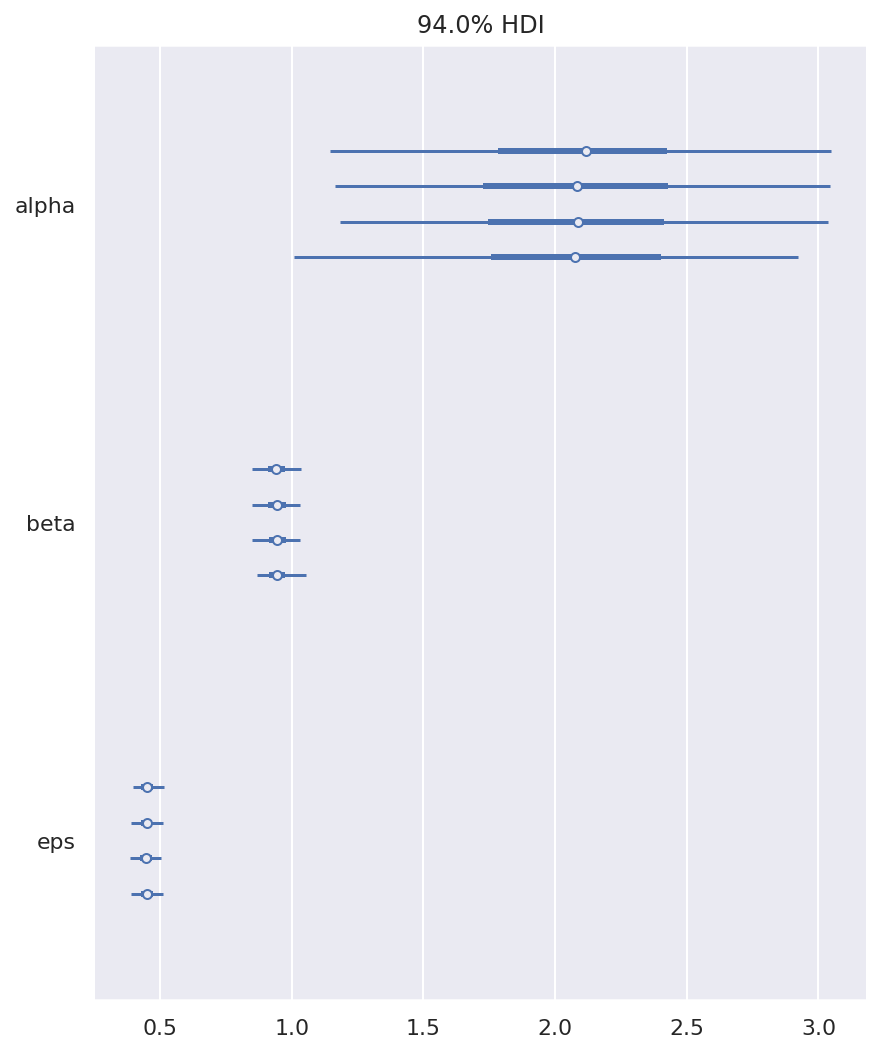

In [8]:
az.plot_forest(trace_g, var_names=['alpha', 'beta', 'eps'])

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'alpha'}>,
       <AxesSubplot:title={'center':'beta'}>,
       <AxesSubplot:title={'center':'eps'}>], dtype=object)

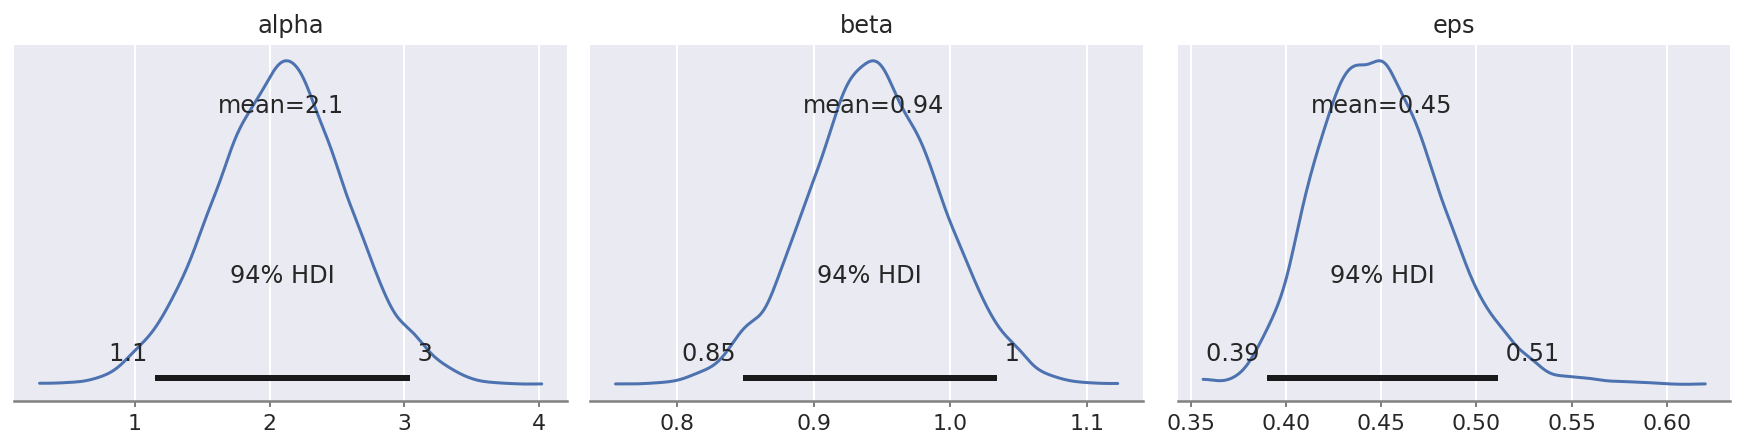

In [9]:
az.plot_posterior(trace_g, 
                  var_names=['alpha', 'beta', 'eps'],
                  figsize=(12,3))

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'alpha'}>,
       <AxesSubplot:title={'center':'beta'}>,
       <AxesSubplot:title={'center':'eps'}>], dtype=object)

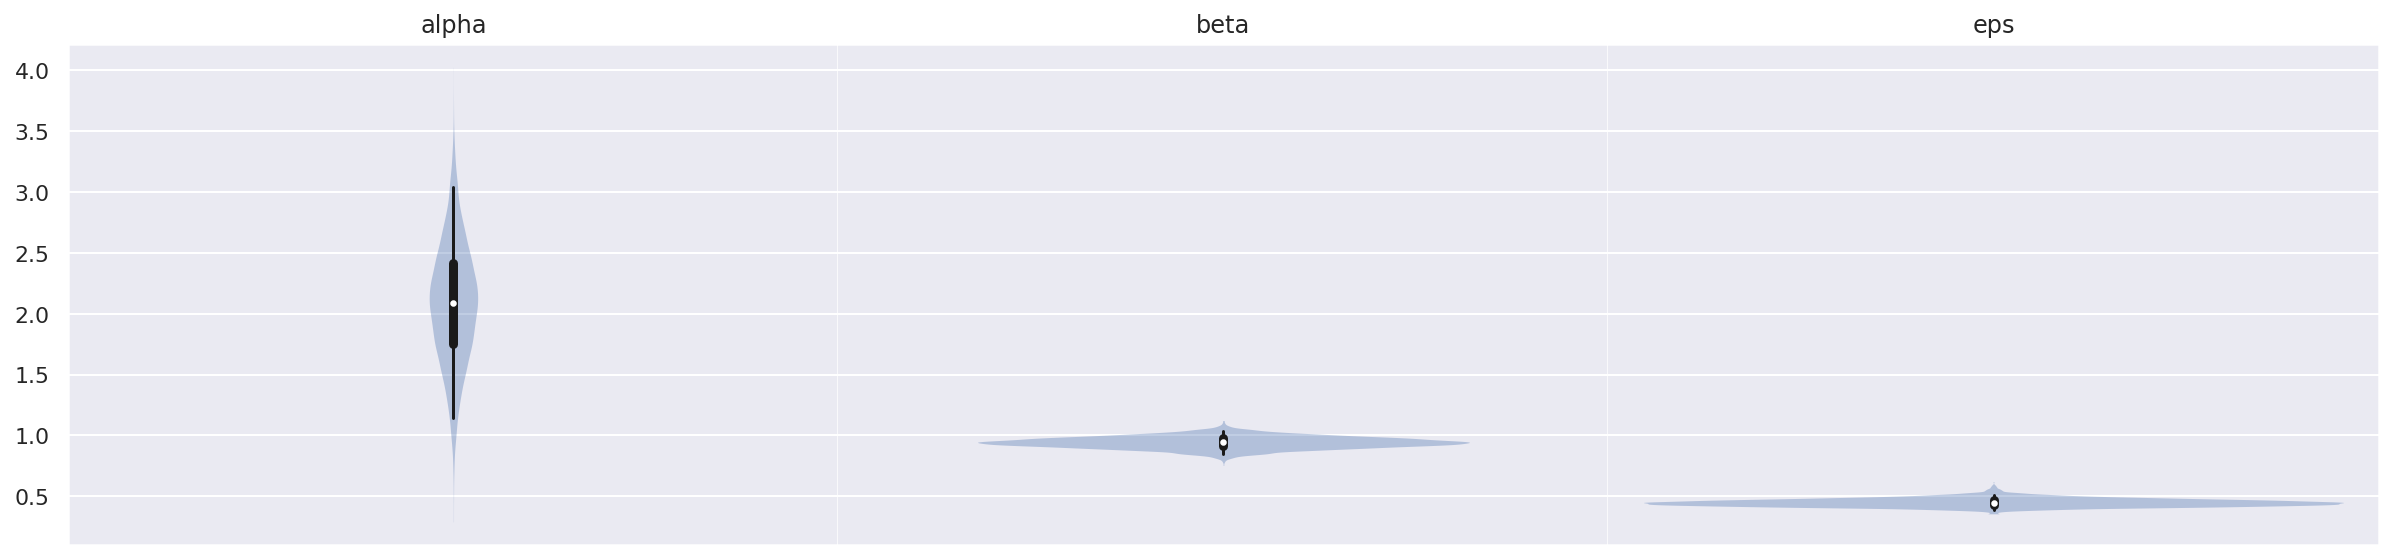

In [10]:
az.plot_violin(trace_g, var_names=['alpha', 'beta', 'eps'],)

Использование линейных моделей приводит к апостериорному распределению, где $\alpha$ и $\beta$ тесно взаимосвязаны, то есть между ними существует сильная корреляция.

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/plots/pairplot.py:188: UserWarning: plot_kwargs will be deprecated. Please use scatter_kwargs, kde_kwargs and/or hexbin_kwargs
  UserWarning,
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


<AxesSubplot:xlabel='alpha', ylabel='beta'>

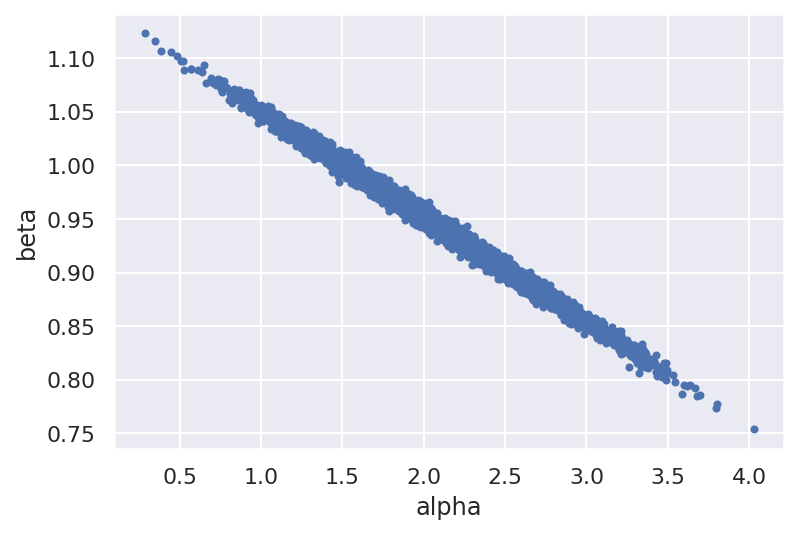

In [11]:
az.plot_pair(trace_g, var_names=['alpha', 'beta'], 
             plot_kwargs={'alpha': 0.01})

Корреляция, наблюдаемая на графике, является прямым следствием наших
предположений. Не имеет значения, какая из линий полностью соответствует исследуемым данным, все они должны проходить через одну точку, то есть через среднее значение переменной x и среднее значение переменной y. Следовательно, процесс подгонки линии в некоторой степени равнозначен вращению прямой линии, закрепленной в центре данных.

При этом  тот факт, что для линии установлено ограничивающее условие прохождения через точку, соответствующую среднему значению данных, является истинным только для метода наименьших квадратов (и соответствующих предварительных предположений). При использовании байесовских методов это ограничение ослабляется.

Форма апостериорного распределения (исключая $\epsilon$) представляет собой весьма диагональное пространство (very diagonal space). Это может стать проблемой для сэмплеров, таких как алгоритм Метрополиса–Гастингса, или в меньшей степени для NUTS.




#### Изменение данных перед обработкой

Одним из простых способов устранения корреляции между $\alpha$ и $\beta$ является центрирование переменной x.

В результате x' центрируется относительно 0, таким образом центр вра-
щения (осевая точка) при изменении угла наклона неизменно является точкой пересечения, следовательно, вероятное пространство параметров теперь в большей степени приобретает форму круга и становится менее коррелированным.

Возврат к исходному масштабу:
$$y = \alpha' + \beta(x - \hat x ) + \epsilon$$
$$y=\alpha' - \beta' \hat x + \beta'x + \epsilon$$

=>$$\alpha = \alpha' - \beta' \hat x$$
$$\beta = \beta'$$

Помимо центрирования данные можно нормализовать, что чатсо используется на практике в статистике и машинном обучении.
В целом нормализация данных помогает мыслить в терминах стандартизированных оценок (z-оценок).

#### Интерпретация и визуальное представление апостериорного распределения

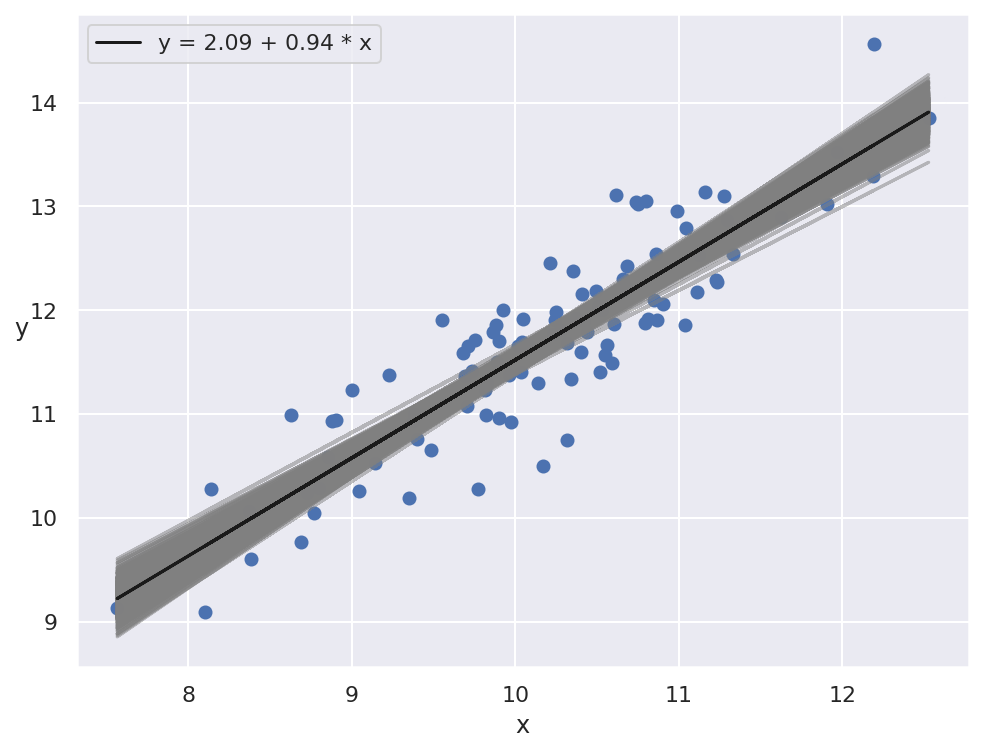

In [12]:
fig = plt.figure(figsize=(8, 6))

plt.scatter(x, y)

alpha_m = trace_g['alpha'].mean()
beta_m = trace_g['beta'].mean()

draws = range(0, len(trace_g['alpha']), 10)
plt.plot(x, trace_g['alpha'][draws] + trace_g['beta'][draws] *
        x[:, np.newaxis], c='gray', alpha=0.5)
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.show()

Возможно добавление интервала плотности апостериорного распределения для $\mu$ прямо на график. Благодаря сохранению значений $\mu$ в памяти с помощью pm.Deterministic.

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/utils.py:661: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,


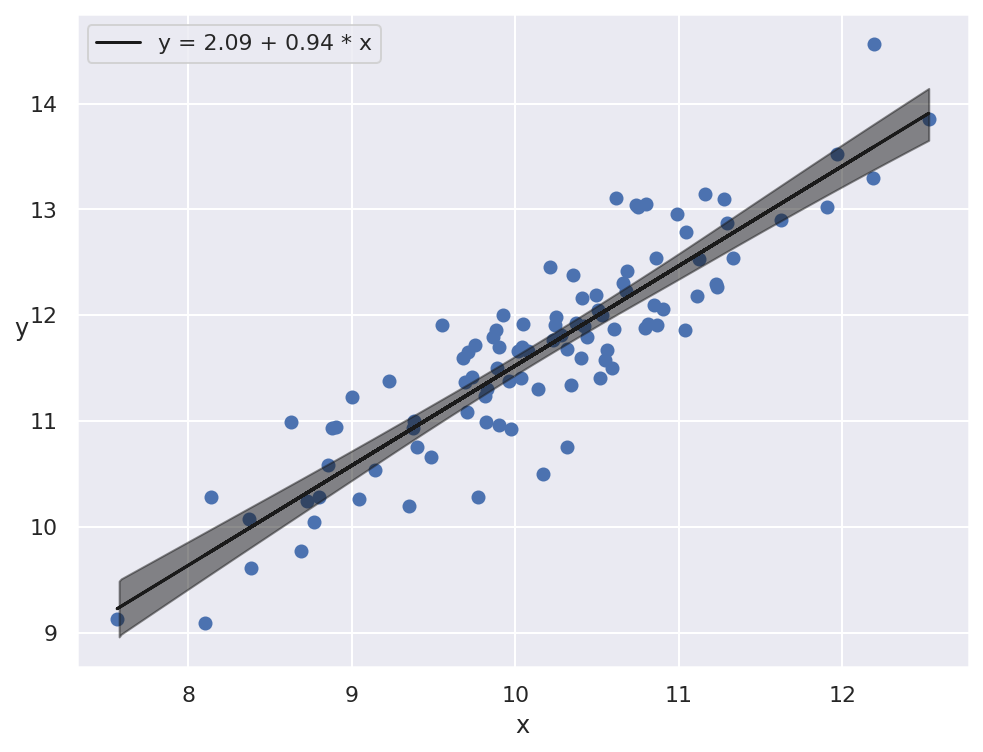

In [13]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
sig = az.plot_hpd(x, trace_g['mu'], credible_interval=0.95, color='k')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()

Также дополнительным графиком для визуального анализа может служить плотность апостериорного распределения прогнозируемой целевой переменной $\hat{y}$, т.е. интервала, где ожидается наблюдение x% будущих данных с учетом выбранной модели.

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/utils.py:661: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  FutureWarning,
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/utils.py:661: UserWarning: Keyword argument credible_interval has been deprecated Please replace with hdi_prob
  ("Keyword argument credible_interval has been deprecated " "Please replace with hdi_prob"),
/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/stats/stats.py:496: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will chan

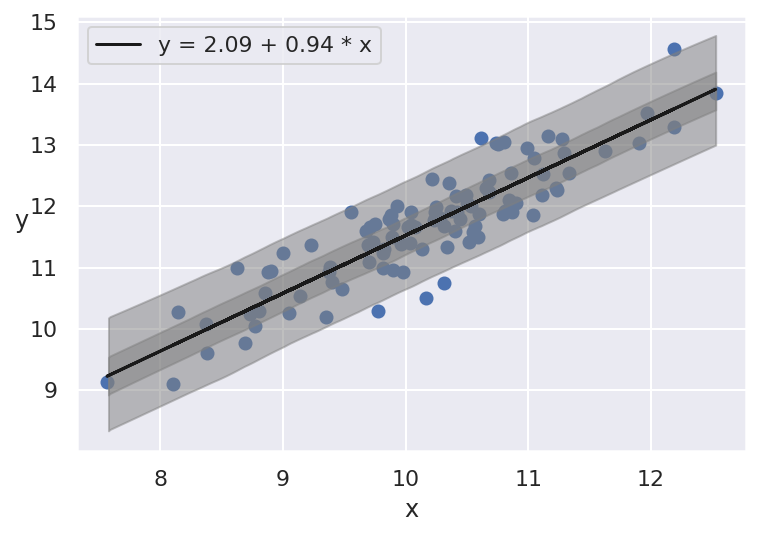

In [14]:
ppc = pm.sample_posterior_predictive(trace_g, samples=2000, model=model_g)

plt.scatter(x, y)
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x'
        )
az.plot_hpd(x, ppc['y'], credible_interval=0.5, color='gray')
az.plot_hpd(x, ppc['y'], credible_interval=0.95, color='gray')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()
plt.show()

In [15]:
# Значение R^2 относительно апостериорного распределения прогнозируемой целевой переменной
az.r2_score(y, ppc['y'])

r2        0.789086
r2_std    0.005960
dtype: float64

#### Коэффициент корреляции Пирсона, вычисляемый по многомерному гауссову распределению:

Один из возможных способов вычисления коэффициента корреляции Пирсона – оценка ковариационной матрицы многомерного гауссова распределения. 

Рассмотрим вариант с размерностью d=2.

Для полного описания данного гауссова распределения, необходим вектор средних $\overline{\mu}$ и ковариационная матрица  $\Sigma=\begin{bmatrix}
\sigma^2_{x_1} & \rho \sigma_{x_1}\sigma_{x_2} \\
\rho\sigma_{x_1}\sigma_{x_2} & \sigma^2_{x_2} 
\end{bmatrix}$, где $\rho$-коэффициент корреляции Пирсона между регрессорами (поскольку переменных всего две, необходим всего один коэффициент)

Для примера рассмотрим конутрные графики - графики линий уровня:

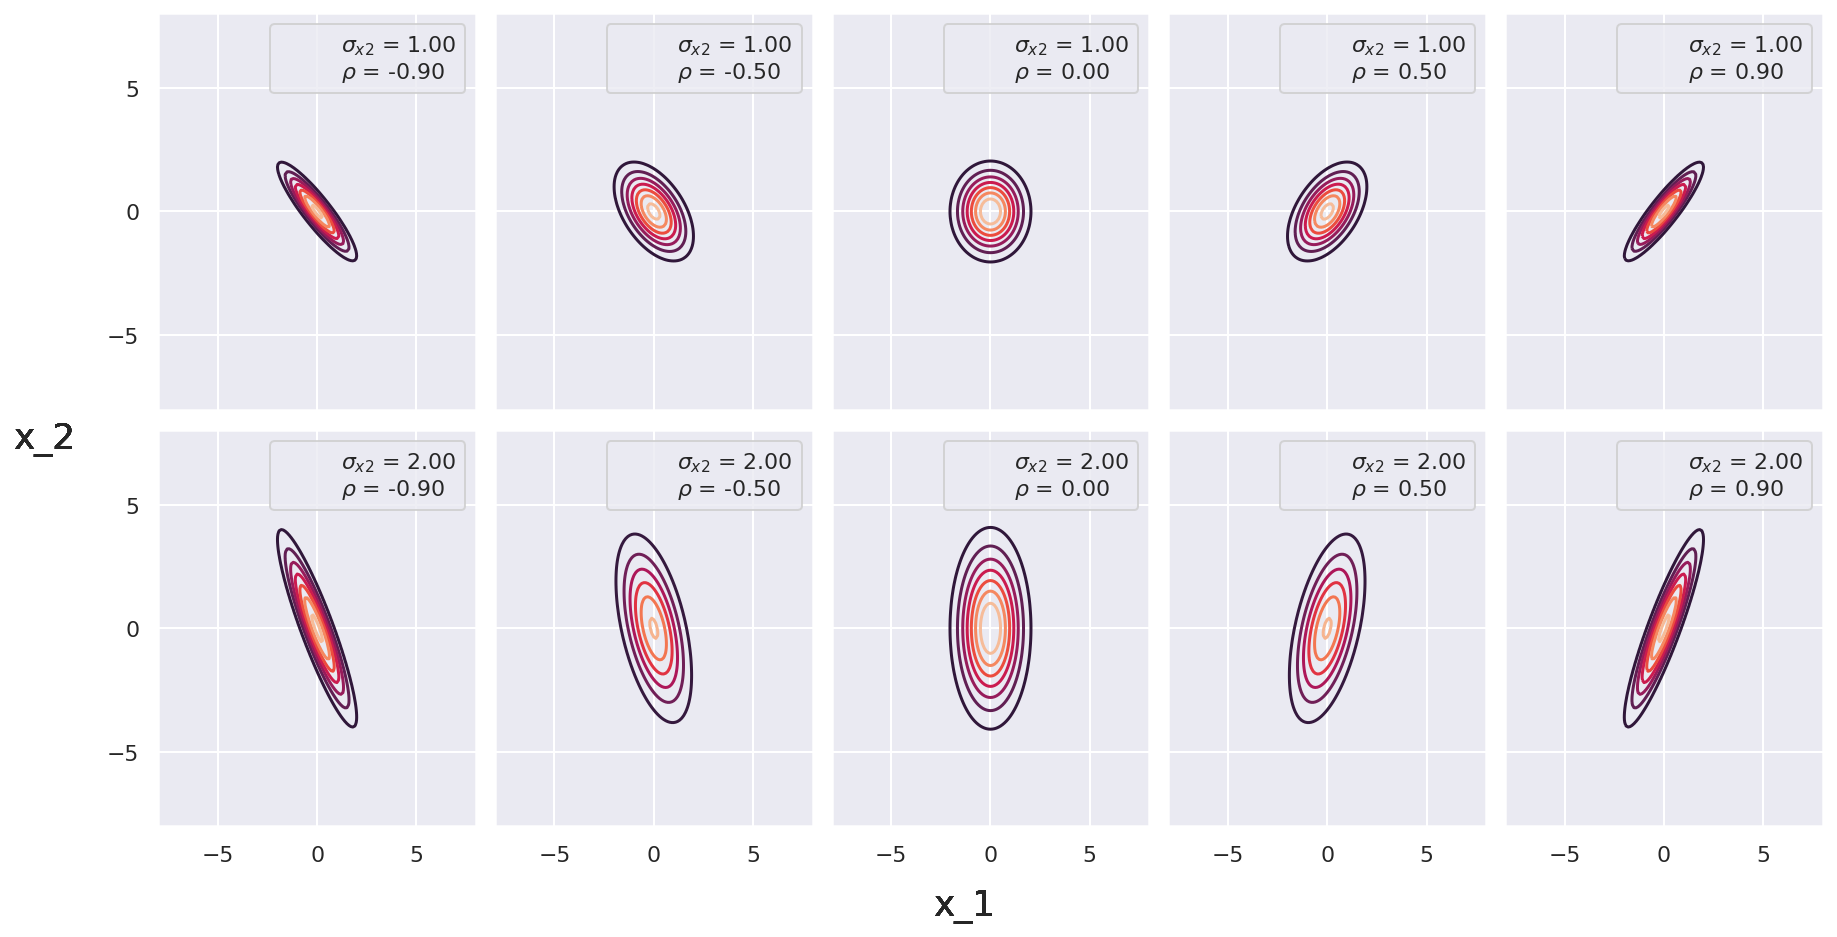

In [16]:
sigma_x1 = 1
sigmas_x2 = [1,2]
rhos = [-0.9, -0.5, 0, 0.5, 0.9]

k, l = np.mgrid[-5:5:.1, -5:5:.1]
pos = np.empty(k.shape + (2,))
pos[:, :, 0] = k
pos[:, :, 1] = l

f, ax = plt.subplots(len(sigmas_x2), len(rhos),
                     sharex=True, sharey=True, 
                     figsize=(12, 6),
                     constrained_layout=True)

for i in range(2):
    for j in range(5):
        sigma_x2 = sigmas_x2[i]
        rho = rhos[j]
        cov = [[sigma_x1**2, sigma_x1*sigma_x2*rho],
               [sigma_x1*sigma_x2*rho, sigma_x2**2]]
        rv = stats.multivariate_normal([0, 0], cov)
        
        ax[i, j].contour(k, l, rv.pdf(pos))
        ax[i, j].set_xlim(-8, 8)
        ax[i, j].set_ylim(-8, 8)
        ax[i, j].set_yticks([-5, 0, 5])
        ax[i, j].plot(0, 0, 
        label=f'$\\sigma_{{x2}}$ = {sigma_x2:3.2f}\n$\\rho$ = {rho:3.2f}', alpha=0)
        ax[i, j].legend()
        f.text(0.5, -0.05, 'x_1', ha='center', fontsize=18)
        f.text(-0.05, 0.5, 'x_2', va='center', fontsize=18, rotation=0)

Поскольку значения элементов ковариационной матрицы неизвестны, мы не устанавливаем для них априорные распределения.
Есть несколько вариантов решения:

1. Использование распределения Уишарта(Wishart distribution). Оно является сопряженным априорным распределением обращенной ковариационной матрицы по многомерной нормали.

2. Априорное распределение LKJ Cholesky: https://docs.pymc.io/notebooks/LKJ.html

3. Задание априорных распределений для элементов ковариационной матрицы. Рассмотрим этот вариант для простейшего случая многомерного гауссова распределения.

In [17]:
data = np.stack((x, y)).T
with pm.Model() as pearson_model:
    # Вектор средний значений
    mu = pm.Normal('mu', mu=data.mean(0), sd=10, shape=2)
    # Априорные распределения для ковариационной матрицы
    sigma1 = pm.HalfNormal('sigma1', 10)
    sigma2 = pm.HalfNormal('sigma2', 10)
    rho = pm.Uniform('rho', -1, 1)
    # Определяем R^2 как детерминированную переменную для расчета
    r2 = pm.Deterministic('r2', rho**2)
    # Формирование ковариационной матрицы
    cov = pm.math.stack(([sigma1**2, rho*sigma1*sigma2],
                         [rho*sigma1*sigma2, sigma2**2])
                       )
    # Правдоподобие
    y_pred = pm.MvNormal('y_pred', mu=mu, cov=cov, observed=data)
    
    trace_p = pm.sample(1000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [rho, sigma2, sigma1, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([[<AxesSubplot:title={'center':'r2'}>,
        <AxesSubplot:title={'center':'r2'}>]], dtype=object)

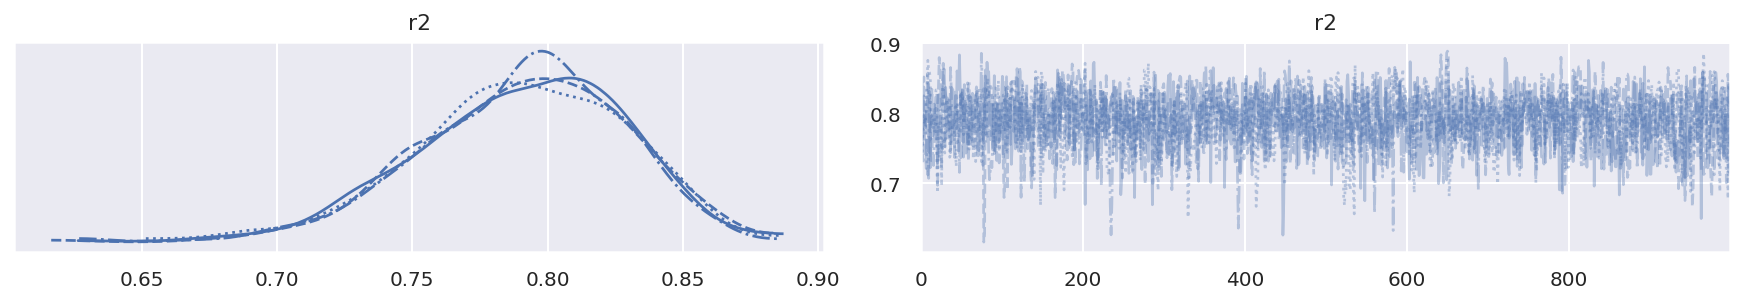

In [18]:
az.plot_trace(trace_p, var_names=['r2'])

In [19]:
az.summary(trace_p, var_names=['r2'])

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
r2,0.79,0.038,0.716,0.855,0.001,0.001,1844.0,1844.0,1837.0,2037.0,1.0


Полученное значение корреляции довольно близко к рассчитанному значению в предыдущем примере.

#### Робастная линейная регрессия

Применение t-распределения Стьюдента представляет собой эффективный способ обработки выбросов и обеспечивает более надежный статистический вывод. Этот же принцип можно применять и для линейной регрессии.

Для подтверждения практическим примером надежности, которую привносит t-распределение Стьюдента в линейную регрессию, воспользуемся очень простым и удобным набором данных: третьей группой данных из квартета Энскомба.

In [20]:
ans = pd.read_csv('data/anscombe.csv')
x_3 = ans[ans.group == 'III']['x'].values
y_3 = ans[ans.group == 'III']['y'].values
x_3 = x_3 - x_3.mean()

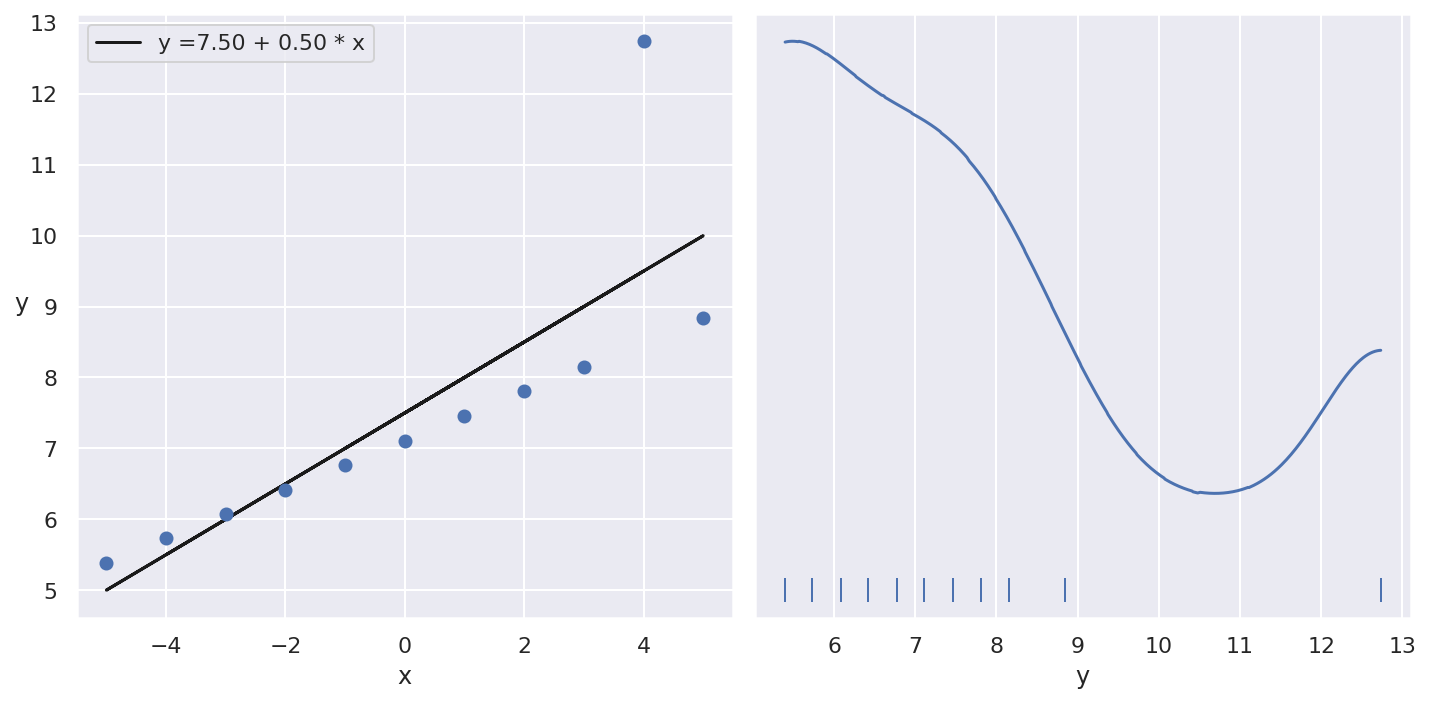

In [21]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
beta_c, alpha_c = stats.linregress(x_3, y_3)[:2]
ax[0].plot(x_3, (alpha_c + beta_c * x_3), 'k',
label=f'y ={alpha_c:.2f} + {beta_c:.2f} * x')
ax[0].plot(x_3, y_3, 'C0o')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].legend(loc=0)
az.plot_kde(y_3, ax=ax[1], rug=True)
ax[1].set_xlabel('y')
ax[1].set_yticks([])
plt.tight_layout()

В следующей модели используется экспоненциальный сдвиг, чтобы избежать значений $\nu$, близких к нулю. Без экспоненциального сдвига наблюдается слишком большой вес значений, близких к нулю.

In [22]:
with pm.Model() as model_t:
    
    alpha = pm.Normal('alpha', mu=y_3.mean(), sd=1)
    beta = pm.Normal('beta', mu=0, sd=1)
    eps = pm.HalfNormal('eps', 5)
    nu_ = pm.Exponential('nu_', 1/29)
    nu = pm.Deterministic('nu', nu_ + 1)
    
    y_pred = pm.StudentT('y_pred', 
                         mu=alpha + beta * x_3, 
                         sd=eps, 
                         nu=nu, 
                         observed=y_3)
    trace_t = pm.sample(2000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu_, eps, beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 19 seconds.
The number of effective samples is smaller than 10% for some parameters.


Изобразим линию робастной подгонки `robust` и линию неробастной подгонки `non-robust`.

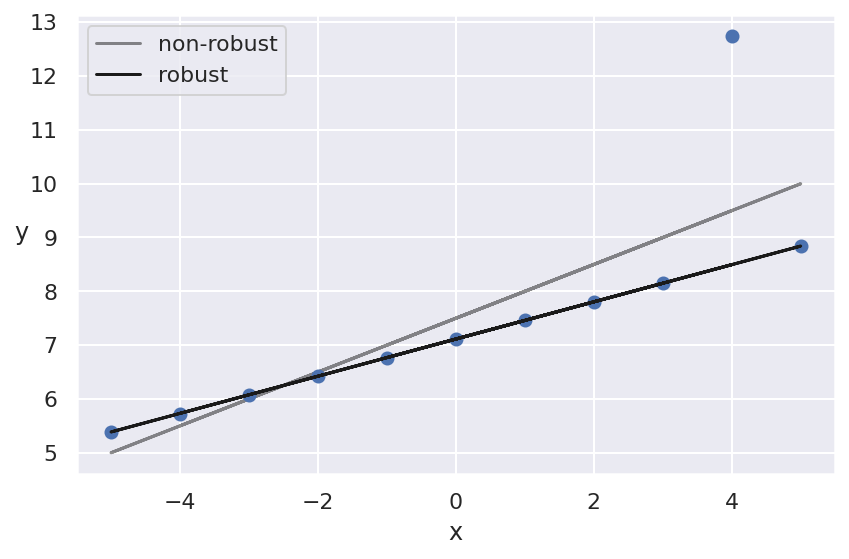

In [23]:
beta_c, alpha_c = stats.linregress(x_3, y_3)[:2]

alpha_m = trace_t['alpha'].mean()
beta_m = trace_t['beta'].mean()

plt.plot(x_3, (alpha_c + beta_c * x_3), 'k',
         label='non-robust', alpha=0.5)
plt.plot(x_3, y_3, 'C0o')
plt.plot(x_3, alpha_m + beta_m * x_3, c='k', label='robust')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend(loc=2)
plt.tight_layout()

In [24]:
az.summary(trace_t, var_names=['alpha', 'beta', 'eps', 'nu'])

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,7.114,0.001,7.112,7.117,0.000,0.000,3868.0,3867.0,4179.0,3499.0,1.0
beta,0.345,0.000,0.345,0.346,0.000,0.000,3119.0,3114.0,3524.0,3322.0,1.0
eps,0.003,0.002,0.001,0.006,0.000,0.000,974.0,974.0,585.0,188.0,1.0
nu,1.208,0.200,1.000,1.569,0.003,0.002,4270.0,4270.0,1929.0,1107.0,1.0


ВЫполним проверку прогнозируемого апостериорного распределения, чтобы оценить, как эффективно модель захватывает данные:

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
posterior predictive variable y_pred's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


(0.0, 12.0)

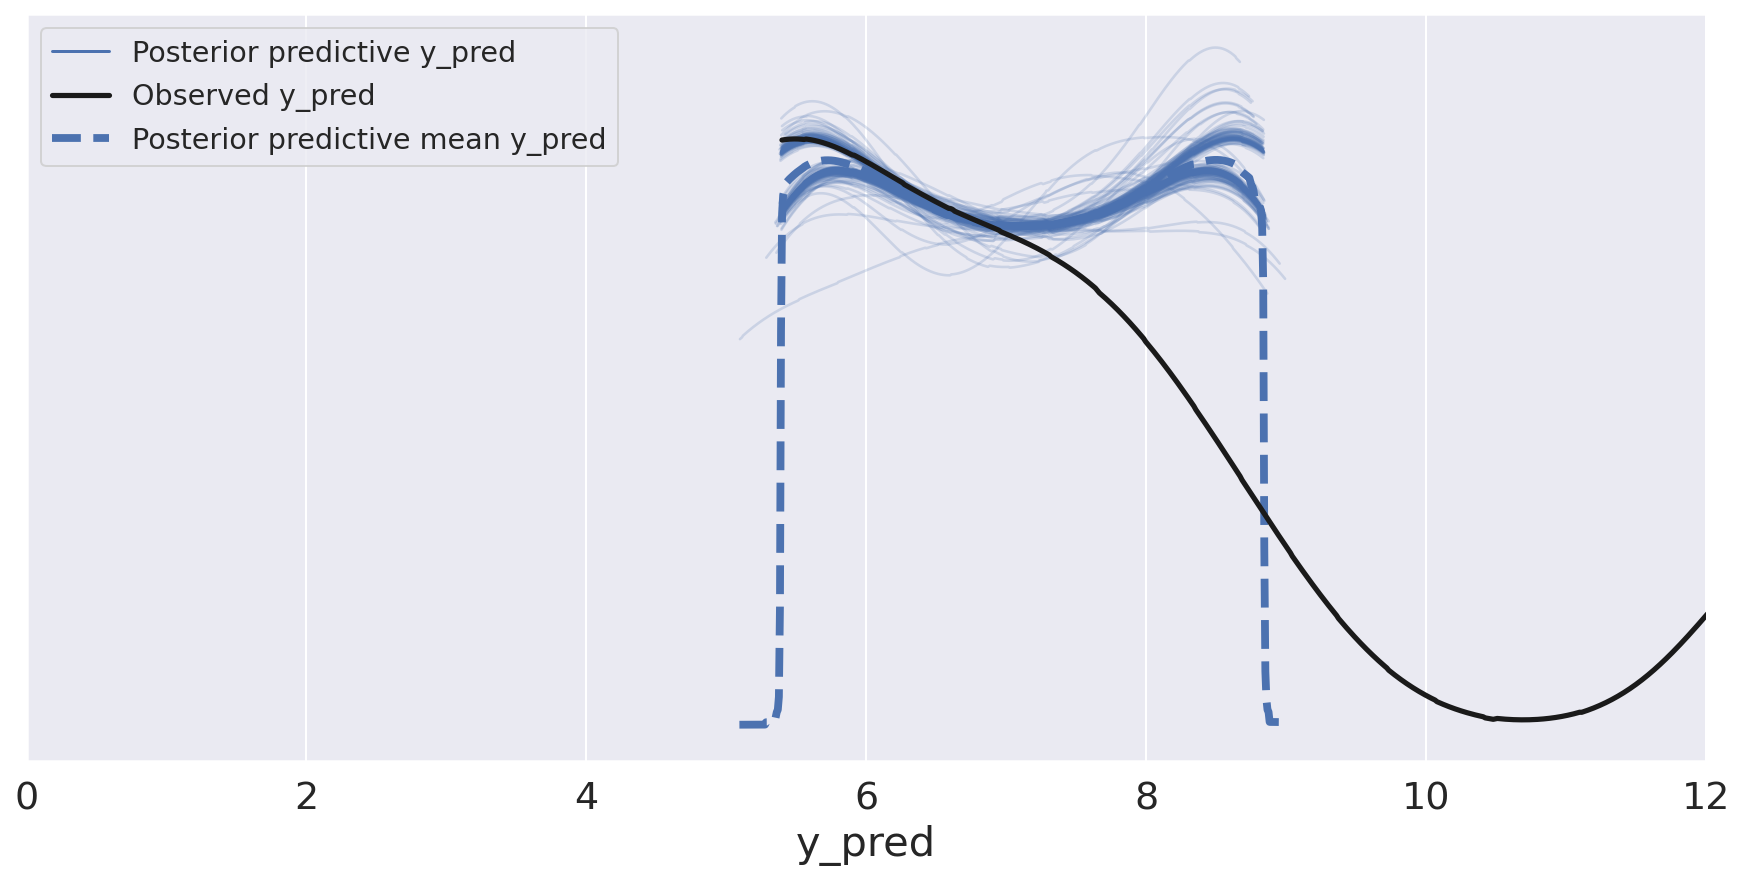

In [25]:
ppc = pm.sample_posterior_predictive(trace_t, 
                                     samples=200,
                                     model=model_t,
                                     random_seed=2)
data_ppc =az.from_pymc3(trace=trace_t, posterior_predictive=ppc)
ax = az.plot_ppc(data_ppc, figsize=(12, 6), mean=True)
plt.xlim(0, 12)

Для основной части данных наблюдается очень хорошее соответствие. Также следует отметить, что используемая модель прогнозирует значения по обе стороны основной группы данных, а не только выше ее. Для наших текущих целей эта модель работает эффективно и не требует дальнейших изменений. В некоторых задачах может возникать необходимость в отме-
не такого поведения. В этом случае, вероятнее всего, мы должны немного отступить и изменить модель так, чтобы ограничить возможные значения y_pred только положительными числами.

#### Иерархическая линейная регрессия

Иерархической подход позволяет моделям выполнять статистические выводы на уровне групп, а оценки вычислять на более высоком уровне. Для этого в предыдущем конспекте вводились априорные гиперраспределения.

Создадим восемь взаимосвязанных групп данных, включая одну группу
с единственной точкой данных:

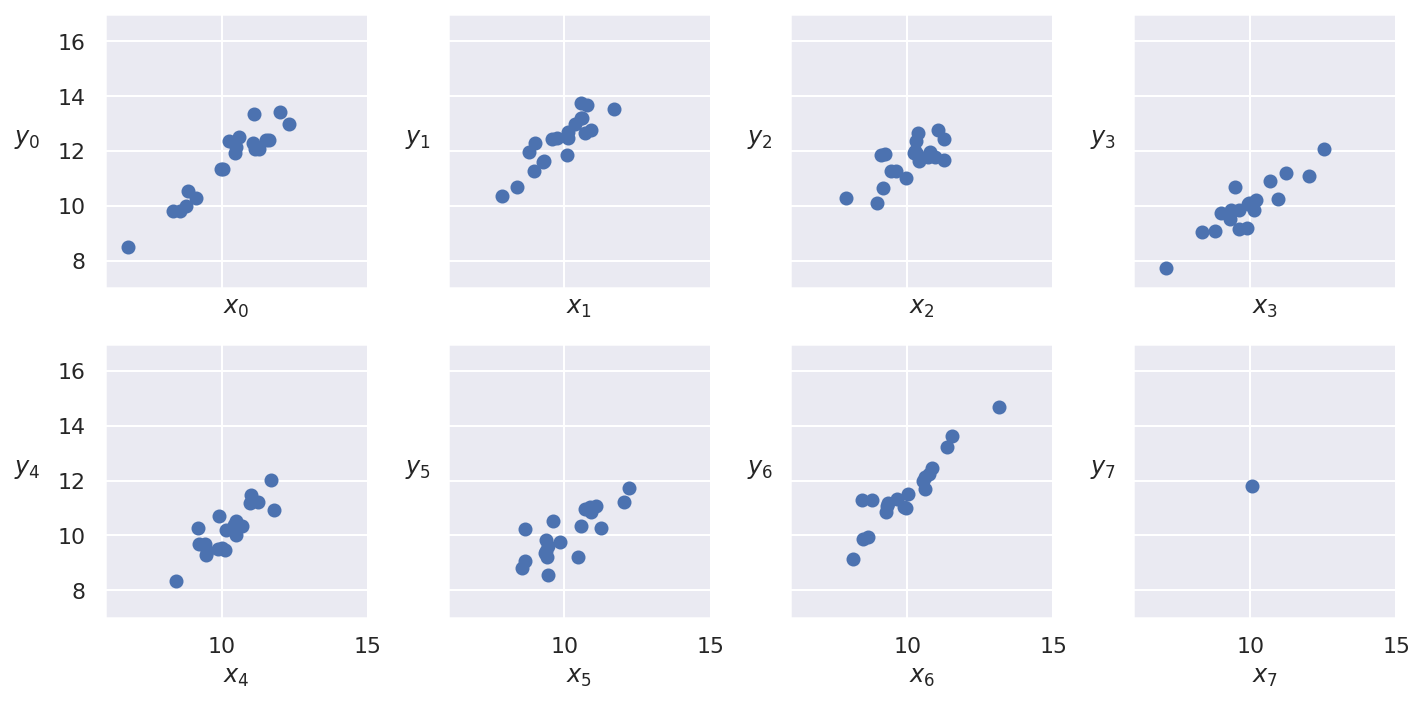

In [26]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)
np.random.seed(314)

alpha_real = np.random.normal(2.5, 0.5, size=M)
beta_real = np.random.beta(6, 1, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))

y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real

_, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True)
ax = np.ravel(ax)

j, k = 0, N

for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'$x_{i}$')
    ax[i].set_ylabel(f'$y_{i}$', rotation=0, labelpad=15)
    ax[i].set_xlim(6, 15)
    ax[i].set_ylim(7, 17)
    j += N
    k += N
plt.tight_layout()

In [27]:
x_centered = x_m - x_m.mean()

Выполним подгонку неиерархической модели. Единственное различие состоит в том, что сейчас добавляется код, возвращающий $\alpha$ к исходному масштабу

In [28]:
with pm.Model() as unpooled_model:
    
    alpha_tmp = pm.Normal('alpha_tmp', mu=0, sd=10, shape=M)
    beta = pm.Normal('beta', mu=0, sd=10, shape=M)
    eps = pm.HalfCauchy('eps', 5)
    nu = pm.Exponential('nu', 1/30)
    
    y_pred = pm.StudentT('y_pred',
                         mu=alpha_tmp[idx] + beta[idx] * x_centered,
                         sd=eps,
                         nu=nu,
                         observed=y_m
                        )
    alpha = pm.Deterministic('alpha', alpha_tmp - beta * x_m.mean())
    trace_up = pm.sample(2000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, eps, beta, alpha_tmp]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 6 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

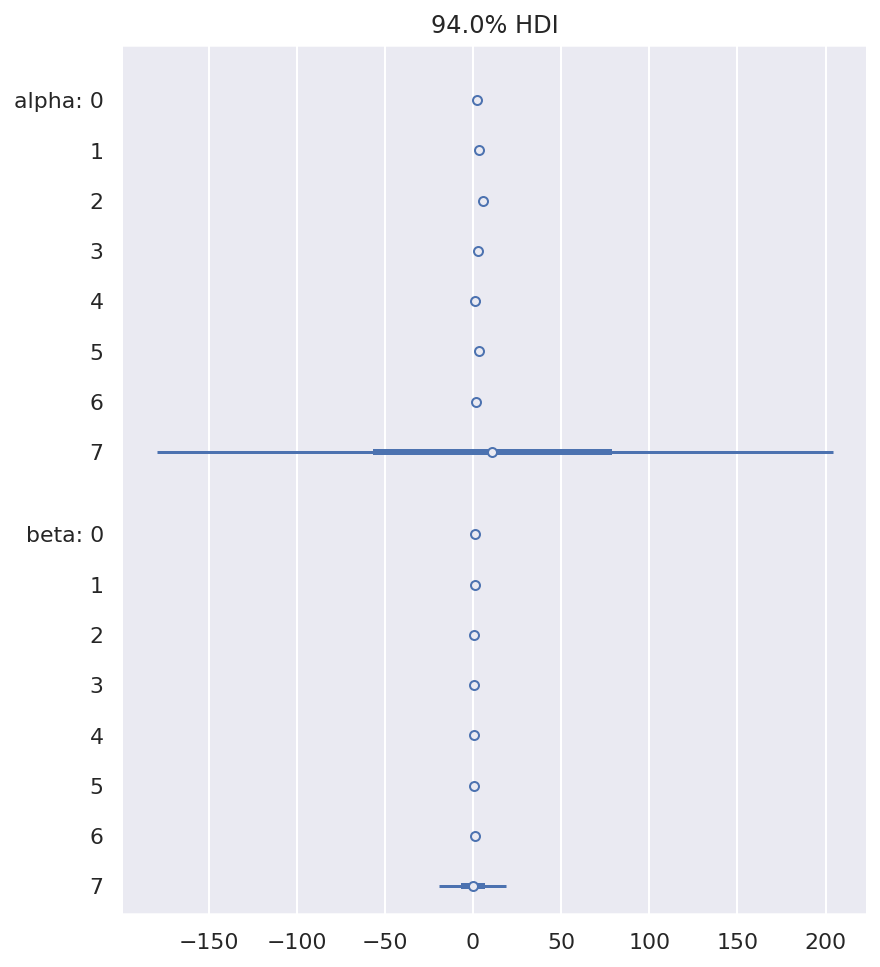

In [29]:
az.plot_forest(trace_up, 
                  var_names=['alpha', 'beta'], 
                  combined=True)

Видно, что для восьмой группы коэффициенты $\alpha_7, \beta_7$ очень широки. Причиной тому является недостаточность данных - для примера в восьмой группе добавлена только одна точка, по которой просто не подогнать прямую линию.

Показанный подход становится весьма полезным в тех случаях, когда имеются группы с разреженными (разбросанными) данными. В рассматриваемом примере разреженность данных была доведена до предела – одна из групп содержала единственную точку данных.

Выполним реализацию иерархической модели, которая представляет собой ту же обычную модель линейной регрессии, но с априорными гиперраспределениями.

In [30]:
with pm.Model() as hierarchical_model:
    
    # Априорные гипер-распределения
    alpha_mu_tmp = pm.Normal('alpha_mu_tmp', mu=0, sd=10)
    alpha_sigma_tmp = pm.HalfNormal('alpha_sigma_tmp', 10)
    beta_mu = pm.Normal('beta_mu', mu=0, sd=10)
    beta_sigma = pm.HalfNormal('beta_sigma', sd=10)
    
    # Априорные распределения
    alpha_tmp = pm.Normal('alpha_tmp',
                          mu=alpha_mu_tmp, 
                          sd=alpha_sigma_tmp,
                          shape=M
                         )
    beta = pm.Normal('beta', mu=beta_mu, sigma=beta_sigma, shape=M)
    eps = pm.HalfCauchy('eps', 5)
    nu = pm.Exponential('nu', 1/30)
    
    y_pred = pm.StudentT('y_pred', 
                         mu=alpha_tmp[idx] + beta[idx] * x_centered,
                         sd=eps, nu=nu, observed=y_m
                        )
    
    alpha = pm.Deterministic('alpha', alpha_tmp - beta_mu * x_m.mean())
    alpha_mu = pm.Deterministic('alpha_mu', alpha_mu_tmp - beta_mu * x_m.mean())
    alpha_sigma = pm.Deterministic('alpha_sigma',
                                   alpha_sigma_tmp - beta_mu * x_m.mean())
    
    trace_hm = pm.sample(1000)   

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, eps, beta, alpha_tmp, beta_sigma, beta_mu, alpha_sigma_tmp, alpha_mu_tmp]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
There were 38 divergences after tuning. Increase `target_accept` or reparameterize.
There were 80 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6985214433595588, but should be close to 0.8. Try to increase the number of tuning steps.
There were 62 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


Для сравнения результатов модели unpooled_model с результатами иерархической модели hierarhical_model необходимо сгенерировать еще один графикв форме леса:


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

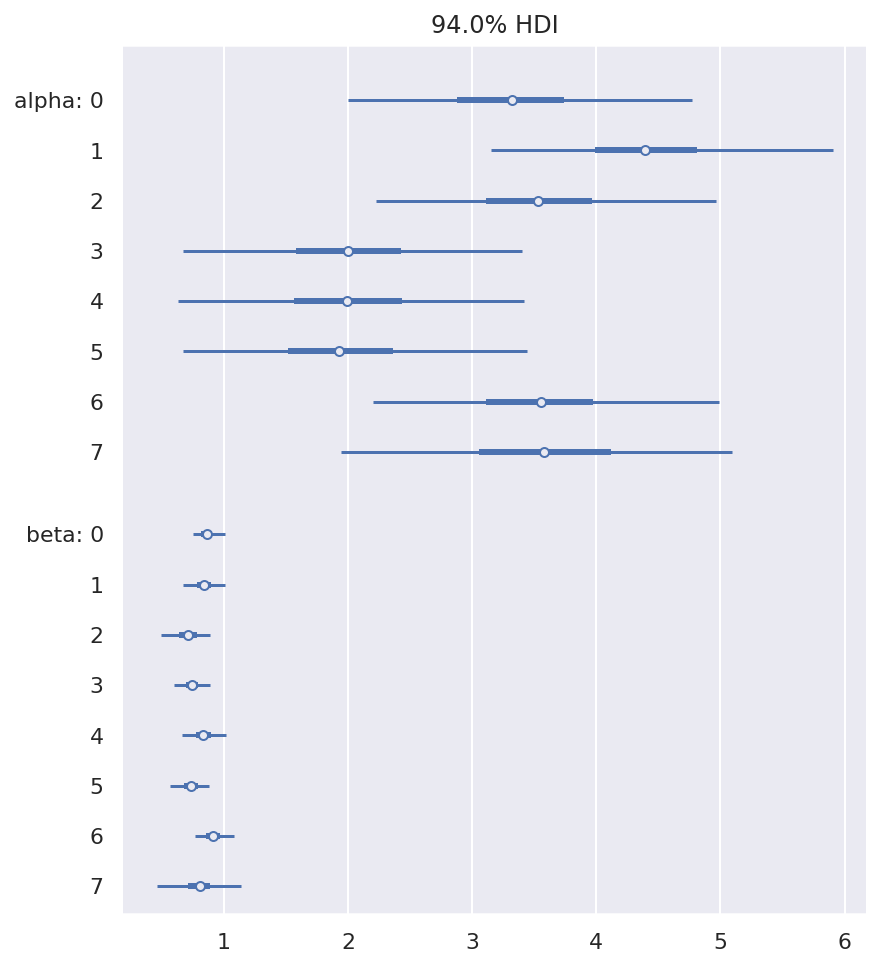

In [31]:
az.plot_forest(trace_hm, var_names=['alpha', 'beta'], combined=True)

Чтобы лучше понять, что именно модель узнает о данных, сгенерируем графики линий подгонки для каждой из восьми групп:

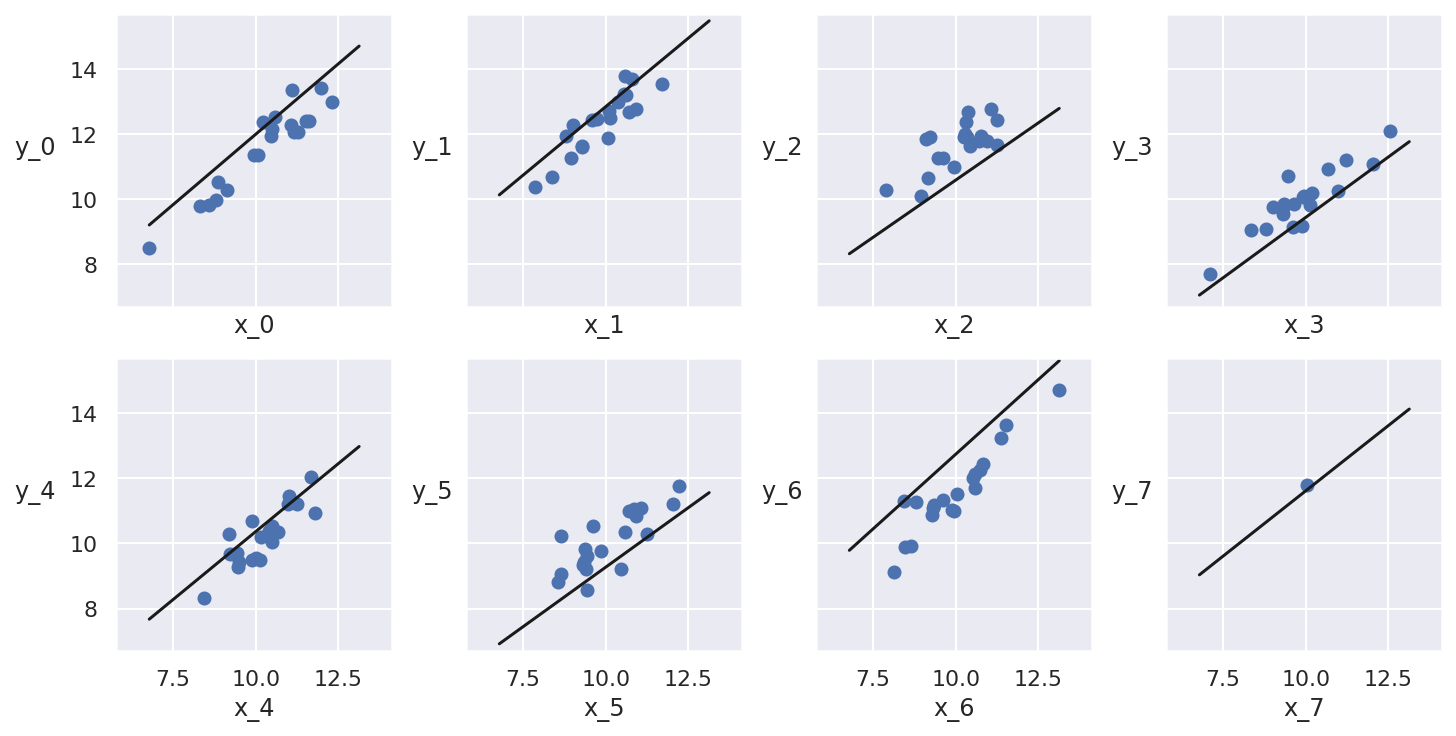

In [32]:
_, ax = plt.subplots(2, 4, figsize=(10, 5), 
                     sharex=True, sharey=True,
                     constrained_layout=True)
ax = np.ravel(ax)
j, k = 0, N
x_range = np.linspace(x_m.min(), x_m.max(), 10)

for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', labelpad=17, rotation=0)
    alpha_m = trace_hm['alpha'][:, i].mean()
    beta_m = trace_hm['beta'][:, i].mean()
    ax[i].plot(x_range, alpha_m + beta_m * x_range, c='k',
    label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
    plt.xlim(x_m.min()-1, x_m.max()+1)
    plt.ylim(y_m.min()-1, y_m.max()+1)
    j += N
    k += N

Используя иерархическую модель, мы получаем возможность подгонки линии даже для одной точки данных, как можно видеть на рисунке 

На первый взгляд может показаться странным или даже неправдоподобным тот факт, что это является прямым следствием применения структуры иерархической модели.

Каждая линия получает информацию от линий других групп, таким образом, в действительности подгонка линии выполняется не по единственной
точке. Вместо этого регулирование положения линии происходит по одной точке, которая располагает информацией, полученной от точек в других группах.

#### Линейная регрессия с несколькими переменными

In [33]:
np.random.seed(314)
N = 100
alpha_real = 2.5
beta_real = [0.9, 1.5]
eps_real = np.random.normal(0, 0.5, size=N)
X = np.array([np.random.normal(i, j, N) for i, j in zip([10, 2], [1, 1.5])]).T
X_mean = X.mean(axis=0, keepdims=True)
X_centered = X - X_mean
y = alpha_real + np.dot(X, beta_real) + eps_real

In [36]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 10))
    for idx, x_i in enumerate(x.T):
        plt.subplot(2, 2, idx+1)
        plt.scatter(x_i, y)
        plt.xlabel(f'$x_{idx+1}$')
        plt.ylabel(f'y', rotation=0)
    plt.subplot(2, 2, idx+2)
    plt.scatter(x[:, 0], x[:, 1])
    plt.xlabel(f'$x_{idx}$')
    plt.ylabel(f'$x_{idx+1}$', rotation=0)

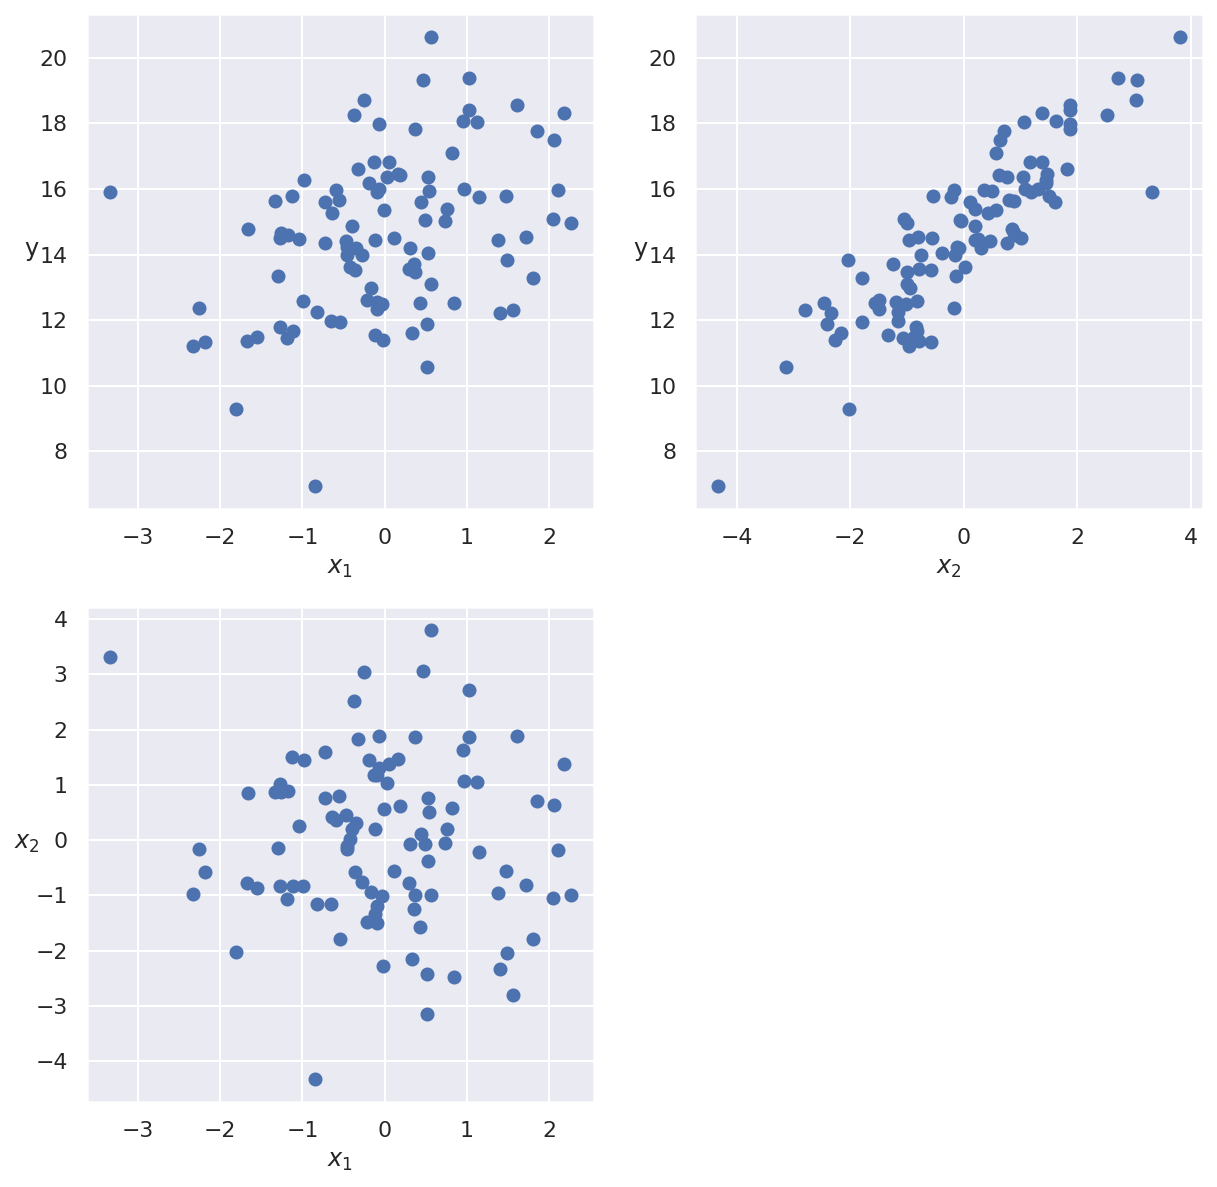

In [37]:
scatter_plot(X_centered, y)

Построим вероятностную модель с двумя переменными

In [38]:
with pm.Model() as model_mlr:
    
    alpha_tmp = pm.Normal('alpha_tmp', mu=0, sd=10)
    # beta-вектор для двух переменных
    beta = pm.Normal('beta', mu=0, sd=1, shape=2)
    eps = pm.HalfCauchy('eps', 5)
    # Произвдение матрицы X и вектора beta
    mu = alpha_tmp + pm.math.dot(X_centered, beta)
    # Вернем alpha для нестандартизированных данных
    alpha = pm.Deterministic('alpha', 
                             alpha_tmp - pm.math.dot(X_mean, beta))
    # Правдоподобие 
    y_pred = pm.Normal('y_pred', mu=mu, sd=eps, observed=y)
    
    trace_mlr = pm.sample(2000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha_tmp]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.


In [39]:
az.summary(trace_mlr, var_names=['alpha', 'beta', 'eps'])

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha[0],1.845,0.450,1.018,2.685,0.004,0.003,11366.0,10235.0,11405.0,6285.0,1.0
beta[0],0.969,0.043,0.893,1.052,0.000,0.000,11430.0,11430.0,11439.0,6228.0,1.0
beta[1],1.470,0.033,1.410,1.532,0.000,0.000,11763.0,11706.0,11760.0,6365.0,1.0
eps,0.474,0.035,0.410,0.541,0.000,0.000,10511.0,10333.0,10567.0,5906.0,1.0


Можно видеть, что применяемая модель в целом воссстанавливает заданные параметры модели.

#### Пример с наличием мультиколлинераности в данных

In [40]:
np.random.seed(42)
N = 100
x_1 = np.random.normal(size=N)
x_2 = x_1 + np.random.normal(size=N, scale=0.01)
y = x_1 + np.random.normal(size=N)
X = np.vstack((x_1, x_2)).T

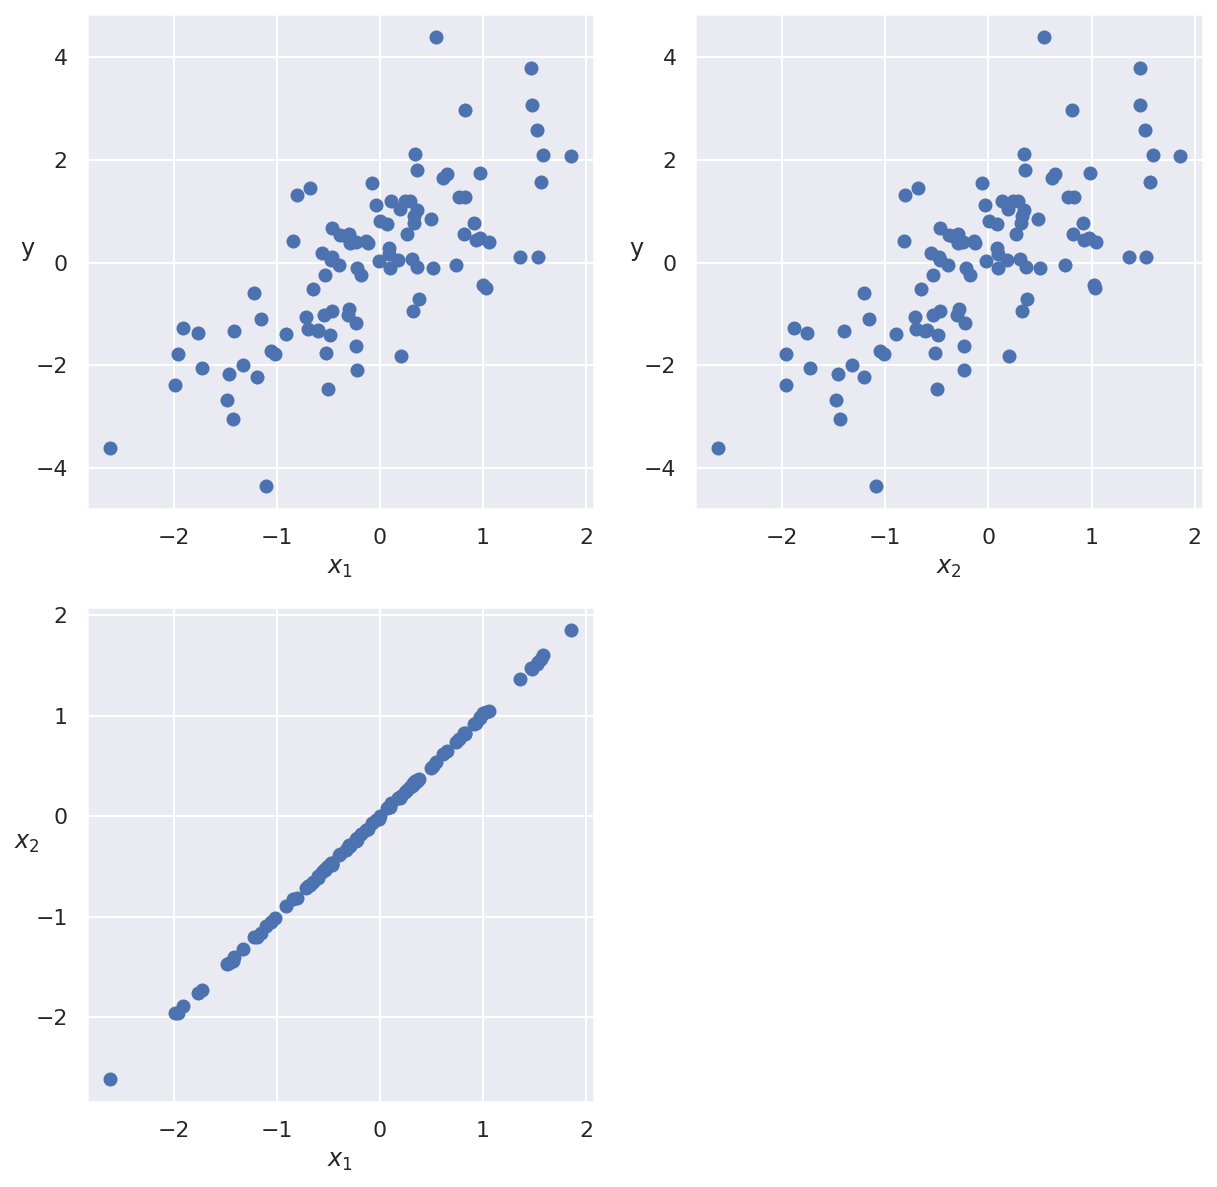

In [41]:
scatter_plot(X, y)

In [42]:
with pm.Model() as model_red:
    
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    eps = pm.HalfCauchy('eps', 5)
    
    mu = alpha + pm.math.dot(X, beta)
    
    y_pred = pm.Normal('y_pred', mu=mu, sd=eps, observed=y)
    
    trace_red = pm.sample(2000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eps, beta, alpha]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 37 seconds.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
There were 112 divergences after tuning. Increase `target_accept` or reparameterize.
There were 12 divergences after tuning. Increase `target_accept` or reparameterize.


/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

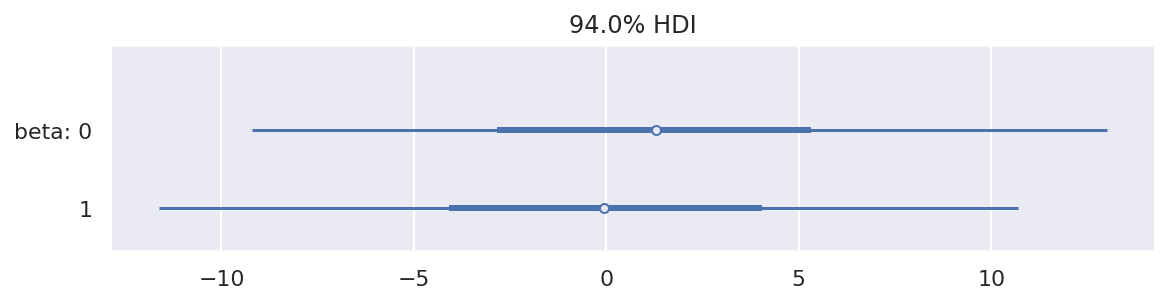

In [43]:
az.plot_forest(trace_red, var_names=['beta'], 
               combined=True, figsize=(8,2)
              )

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/arviz/data/io_pymc3.py:92: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


<AxesSubplot:xlabel='beta\n0', ylabel='beta\n1'>

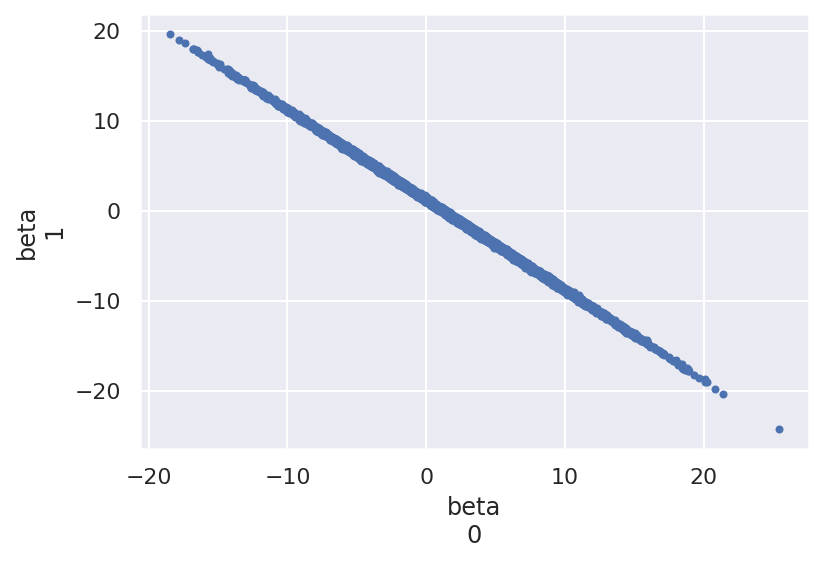

In [44]:
az.plot_pair(trace_red, var_names=['beta'])

Как видим, на графиках имеется коррелируемость коэффициентов, а их значения в вероятностном интервале вокруг 0. Соответсвтенно, модель не детерминирована.

Прежде, чем строить любую вероятностную модель, стоит рассматривать корреляционные матрицы переменных.

#### Моделирование дисперсии, когда отсутствует предположение о ее постоянстве

In [51]:
from theano import shared

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Month', ylabel='Lenght'>

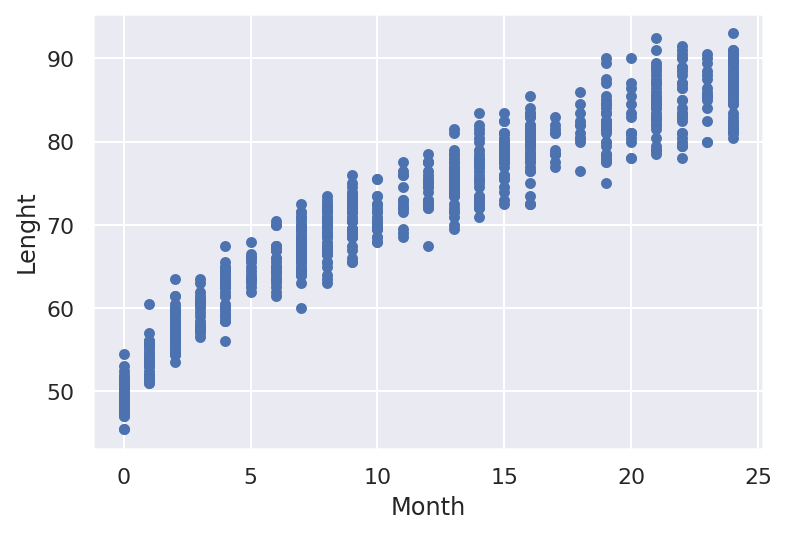

In [52]:
data = pd.read_csv('data/babies.csv')
data.plot.scatter('Month', 'Lenght')

In [53]:
with pm.Model() as model_vv:
    
    alpha = pm.Normal('alpha', sd=10)
    beta = pm.Normal('beta', sd=10)
    
    gamma = pm.HalfNormal('y', sd=10)
    sigma = pm.HalfNormal('sigma', sd=10)
     
    x_shared = shared(data.Month.values * 1.)
    
    mu = pm.Deterministic('mu', alpha + beta * x_shared**0.5)
    eps = pm.Deterministic('eps', gamma + sigma * x_shared)
    
    y_pred = pm.Normal('y_pred', mu=mu, sd=eps, observed=data.Lenght)
    
    trace_vv = pm.sample(1000, tune=1000)

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, y, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


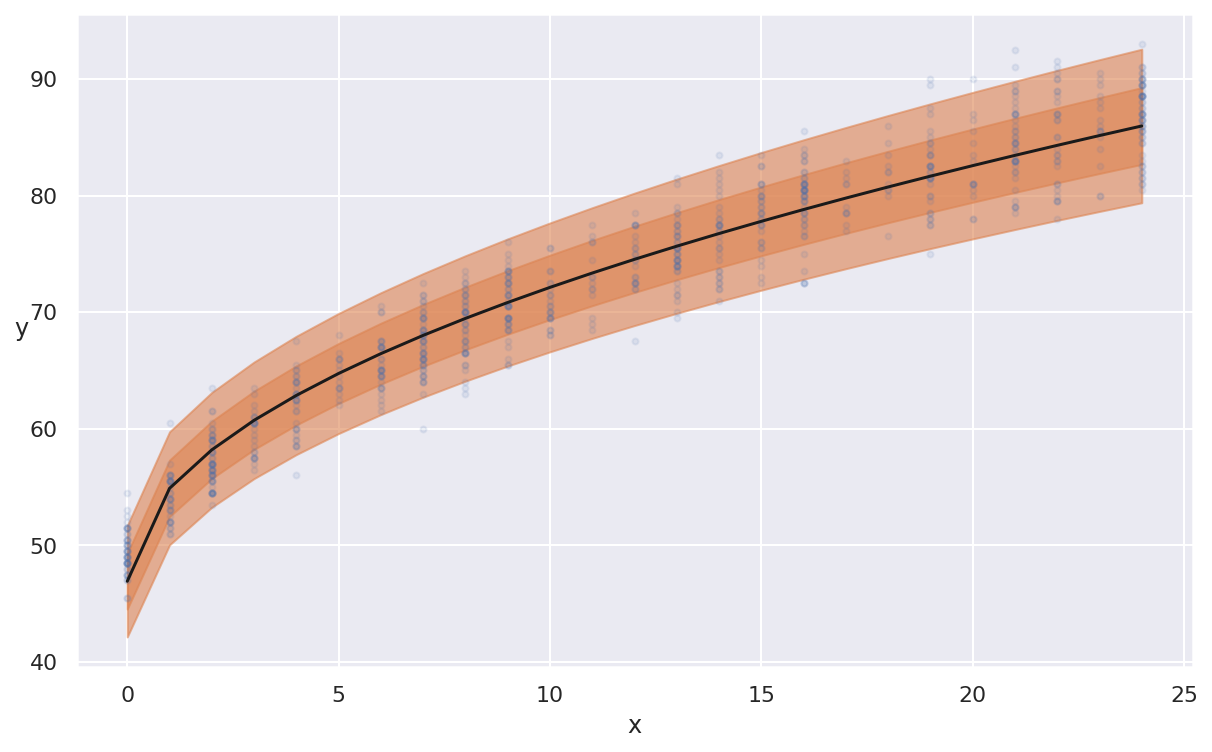

In [58]:
fig = plt.figure(figsize=(10,6))
plt.plot(data.Month, data.Lenght, 'C0.', alpha=0.1)

mu_m = trace_vv['mu'].mean(0)
eps_m = trace_vv['eps'].mean(0)

plt.plot(data.Month, mu_m, c='k')
plt.fill_between(data.Month, mu_m+1*eps_m, mu_m-1*eps_m,
                 alpha=0.6, color='C1')
plt.fill_between(data.Month, mu_m+2*eps_m, mu_m-2*eps_m,
                 alpha=0.6, color='C1')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.show()

Простейший способ получения прогнозов для ненаблюдаемых значений x – определение совместно используемой (разделяемой) переменной (как части модели) и последующего обновления этой переменной непосредственно перед выполнением выборки из прогнозируемого апостериорного распределения.

In [116]:
x_shared.set_value([0.5])
ppc = pm.sample_posterior_predictive(trace_vv, 2000, model=model_vv)
y_ppc = ppc['y_pred'][:, 0]

/home/alexander/anaconda3/envs/exp_env/lib/python3.7/site-packages/pymc3/sampling.py:1691: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "


Теперь можно построить график ожидаемого распределения роста при значении 0.5 и вычислить дополнительные характеристики:

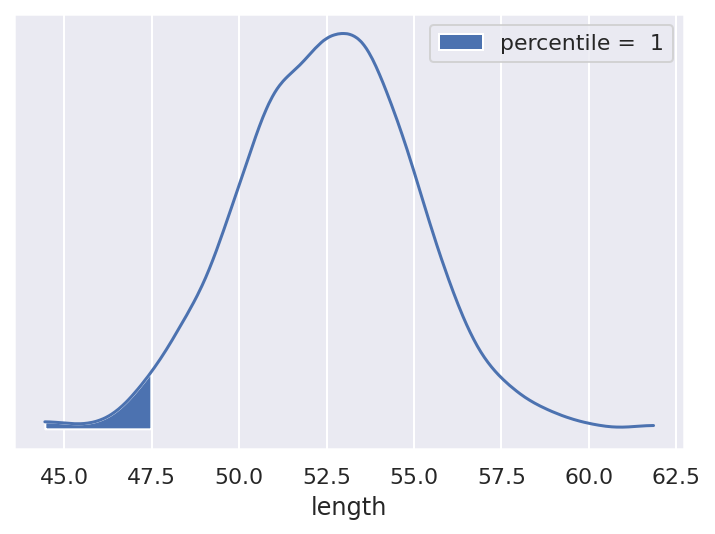

In [127]:
ref = 47.5
density, grid = az.kde(y_ppc)
l, u = min(density), max(density)
x_ = np.linspace(l, u, 512)

plt.plot(density, grid)
percentile = int(sum(y_ppc <= ref) / len(y_ppc) * 100)

plt.fill_between(x_[x_ < ref],
                 grid[x_ < ref],
                 label='percentile = {:2d}'.format(percentile))


plt.xlabel('length')
plt.yticks([])
plt.legend()
plt.show()